In [1]:
from keras import models
from keras import layers

def build_network(hidden_layer_size, output_size=10):
    network = models.Sequential()
    network.add(layers.Dense(hidden_layer_size, activation='relu', input_shape=(28*28,)))
    network.add(layers.Dense(output_size, activation='softmax'))
    
    network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

def prepare_data(train_size):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
        
    x_val = x_train[train_size:]
    y_val = y_train[train_size:]
    
    x_train = x_train[:train_size]
    y_train = y_train[:train_size]

    x_train = x_train.reshape((-1, 28*28))
    x_train = x_train.astype('float32')/255

    x_test = x_test.reshape((-1, 28*28))
    x_test = x_test.astype('float32')/255

    x_val = x_val.reshape((-1, 28*28))
    x_val = x_val.astype('float32')/255
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_val = to_categorical(y_val)
    
    return x_train, y_train, x_test, y_test, x_val, y_val

In [3]:
network = build_network(512)
x_train, y_train, x_test, y_test, x_val, y_val = prepare_data(1000)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
history = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 59000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 881us/step - loss: 1.4271 - acc: 0.5760 - val_loss: 0.8564 - val_acc: 0.7854
Epoch 2/20
1000/1000 [==============================] - 1s 801us/step - loss: 0.6188 - acc: 0.8660 - val_loss: 0.6390 - val_acc: 0.8219
Epoch 3/20
1000/1000 [==============================] - 1s 688us/step - loss: 0.4294 - acc: 0.8930 - val_loss: 0.5260 - val_acc: 0.8537
Epoch 4/20
1000/1000 [==============================] - 1s 662us/step - loss: 0.3390 - acc: 0.9240 - val_loss: 0.5020 - val_acc: 0.8545
Epoch 5/20
1000/1000 [==============================] - 1s 653us/step - loss: 0.2813 - acc: 0.9310 - val_loss: 0.4611 - val_acc: 0.8630
Epoch 6/20
1000/1000 [==============================] - 1s 657us/step - loss: 0.2140 - acc: 0.9590 - val_loss: 0.4428 - val_acc: 0.8652
Epoch 7/20
1000/1000 [==============================] - 1s 649us/step - loss: 0.1791 - 

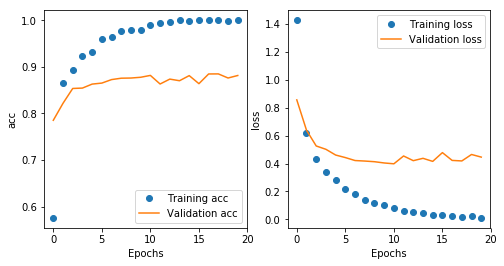

In [6]:
from util import plot_history

plot_history(history)

In [7]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 25us/step
test acc: 0.8867


In [8]:
network = build_network(256)
history2 = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 1000 samples, validate on 59000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 703us/step - loss: 1.5484 - acc: 0.5610 - val_loss: 1.0088 - val_acc: 0.7744
Epoch 2/20
1000/1000 [==============================] - 0s 482us/step - loss: 0.7511 - acc: 0.8530 - val_loss: 0.7319 - val_acc: 0.8129
Epoch 3/20
1000/1000 [==============================] - 0s 476us/step - loss: 0.5257 - acc: 0.8920 - val_loss: 0.6027 - val_acc: 0.8358
Epoch 4/20
1000/1000 [==============================] - 0s 478us/step - loss: 0.4274 - acc: 0.9010 - val_loss: 0.5666 - val_acc: 0.8346
Epoch 5/20
1000/1000 [==============================] - 0s 464us/step - loss: 0.3474 - acc: 0.9270 - val_loss: 0.5210 - val_acc: 0.8476
Epoch 6/20
1000/1000 [==============================] - 0s 471us/step - loss: 0.3019 - acc: 0.9320 - val_loss: 0.4762 - val_acc: 0.8620
Epoch 7/20
1000/1000 [==============================] - 0s 471us/step - loss: 0.2428 - acc: 0.9490 - val_loss: 0.4557 - val_acc: 0.8608

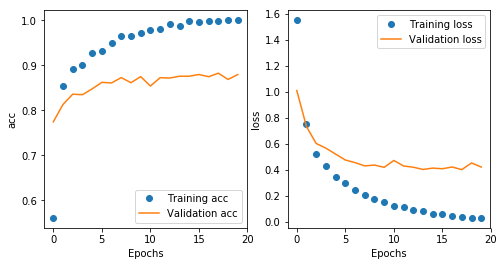

In [9]:
plot_history(history2)

In [10]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 19us/step
test acc: 0.8813


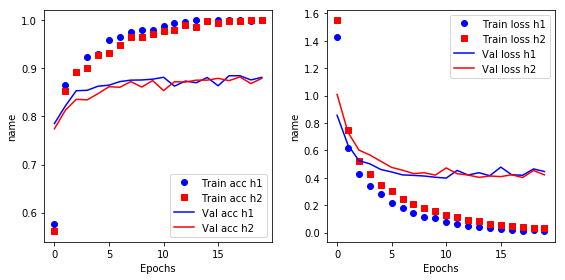

In [11]:
from util import compare_history

compare_history(history, history2)